# Create a raster file with the lidar data

Convert the lidar data from a vector to a raster

_time < 5m_

_input: LBand cropped from N2, LVIS_

## 1. Import modules

In [2]:
import plant
from os import path
import numpy as np

## 2. Global variables

In [3]:
from config import *

## 3. Create and colocate the raster

In [3]:
footprint = np.mean(plant.m_to_deg(18.25, lat=-0.8))

_ = plant.csv_reader(lvisL2Files,
                     output_file=lvis_zt_file,
                     bbox_file=file_LHH,
                     footprint=footprint,
                     lon_text='TLON', lat_text='TLAT',
                     data_text_list='ZT',
                     lvis=True,
                     save_as_raster_gdal=True,
                     **options)
_ = plant.csv_reader(lvisL2Files,
                     output_file=lvis_zg_file,
                     bbox_file=file_LHH,
                     footprint=footprint,
                     lon_text='GLON', lat_text='GLAT',
                     data_text_list='ZG',
                     lvis=True,
                     save_as_raster_gdal=True,
                     **options)
_ = plant.util(lvis_zt_file,
               lvis_zg_file,
               output_file=lvis_file,
               diff=True,
               **options)
_ = plant.mosaic(lvis_file,
                 output_file=lvis_file_40,
                 step_m=40,
                 interp='average',
                 **options)

## 4. Visualize the data

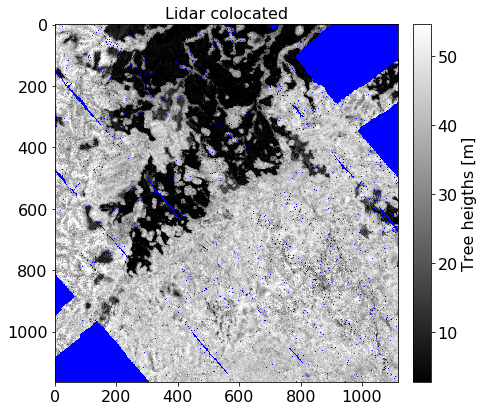

In [6]:
_ = plant.display(lvis_file, label='Lidar colocated', colorbar_label='Tree heigths [m]', **options)

Share the results with the MAAP: raster LVIS colocated